# Predictive Model
#### by Reinier Kamphorst, 7 november 2025

## Prepare Data
#### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#### Load cleaned dataset

In [5]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('/content/cleaned_voice_data.xlsx')

# Display the first 5 rows of the DataFrame
display(df.head())

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,A,G_w,label
0,0.127341,0.355538,1587507015,2002198851,2.737972e+09,0.066798,-2335662079,4850442123,-3.451809e+09,-3.627230e+09,...,-1.310776e+09,-2.819063e+09,1.143172e+09,4.134034e+08,5.279483e+09,3.909240e+09,4.903706e+09,20,True,Healthy
1,0.215317,0.250342,1272900724,1850302841,1.692920e+09,0.043325,-1794196014,1197057419,8.822311e-01,-2.516758e+09,...,-2.392707e+09,7.790230e+09,-7.037875e+09,-9.193601e+09,1.118356e+09,-2.173607e+09,-9.420938e+09,22,True,Healthy
2,0.212512,0.251419,9192037946,1014718104,1.275967e+09,0.047079,-2091861877,1671356506,-3.739819e+09,-1.243570e+09,...,-6.071826e-01,-2.004069e+09,-4.153456e+09,-2.725145e+09,-1.066972e+09,-2.336876e+09,7.741264e+09,66,False,Healthy
3,0.198861,0.157396,1119517351,15294906,1.501658e+09,0.045487,-210244278,139819519,-7.774013e+09,1.363091e+09,...,1.274221e+09,-1.635504e-01,7.797343e+09,-2.631500e+09,-6.622046e+09,5.351196e-01,7.496952e-01,31,False,Healthy
4,0.370113,0.143538,1060678054,1346299507,1.524942e+09,0.050109,-1750399475,1819052124,-3.318161e+09,-9.176344e-02,...,-2.583305e+08,-2.093983e+09,1.330665e+09,-2.659746e+09,-8.324528e+08,1.078601e+09,-6.677513e+09,25,False,Healthy


In [6]:
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode the target variable 'y' if it's categorical
# Check if y is already numerical or needs encoding
if y.dtype == 'object' or y.dtype == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Target variable 'y' encoded successfully.")
    print("Original labels:", le.classes_)
    print("Encoded labels:", np.unique(y))
else:
    print("Target variable 'y' is already numerical, no encoding needed.")

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Target variable 'y' encoded successfully.
Original labels: ['Healthy' 'Unhealthy']
Encoded labels: [0 1]

Shape of X: (2035, 28)
Shape of y: (2035,)


## Split Data

This will help us evaluate the model's performance on unseen data. The test set will be 20% of the total data, and the split will be stratified based on the target variable y to maintain the proportion of classes.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1628, 28)
X_test shape: (407, 28)
y_train shape: (1628,)
y_test shape: (407,)


The data has been successfully split into training and testing sets! Here are the shapes of the new datasets:

X_train (features for training): (1628, 28)
X_test (features for testing): (407, 28)
y_train (target for training): (1628,)
y_test (target for testing): (407,)
This means you now have 1628 samples for training your model and 407 samples for evaluating its performance.

## Experiment with Algorithms
Random Forest and XGBoost


## Random Forest Model

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8305

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       137
           1       0.85      0.90      0.88       270

    accuracy                           0.83       407
   macro avg       0.82      0.79      0.80       407
weighted avg       0.83      0.83      0.83       407



## XGBoost Model

Initialize an XGBoost Classifier with `random_state=42`, `use_label_encoder=False`, and `eval_metric='logloss'`. Then, train this initial model on the training data (`X_train`, `y_train`).


**Reasoning**:
I need to import the XGBoost classifier, initialize it with the specified parameters, and then train it using the training data.



In [10]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)
print("XGBoost model initialized and trained successfully.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:45:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model initialized and trained successfully.


**Reasoning**:
The previous code generated a warning because `use_label_encoder` is deprecated. I need to remove this parameter from the `XGBClassifier` initialization to resolve the warning.



In [11]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)
print("XGBoost model initialized and trained successfully.")

XGBoost model initialized and trained successfully.


## Define Hyperparameter Grid for XGBoost

### Subtask:
Define a dictionary for `param_grid` including hyperparameters such as `n_estimators` (e.g., [100, 200, 300]) and `max_depth` (e.g., [3, 5, 7]) for the XGBoost classifier. You may also consider adding `learning_rate`.


**Reasoning**:
I need to define the hyperparameter grid as a dictionary named `param_grid` with specified values for `n_estimators`, `max_depth`, and `learning_rate` for tuning the XGBoost model.



In [12]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

print("Hyperparameter grid defined successfully:")
print(param_grid)

Hyperparameter grid defined successfully:
{'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}


**Reasoning**:
Now that the hyperparameter grid is defined, the next step is to use GridSearchCV to search for the best combination of hyperparameters for the XGBoost model. This involves importing GridSearchCV and initializing it with the trained XGBoost model, the defined parameter grid, cross-validation settings, and a scoring metric.



In [13]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

print("GridSearchCV initialized successfully.")

GridSearchCV initialized successfully.


**Reasoning**:
Now that GridSearchCV is initialized, I need to fit it to the training data (`X_train`, `y_train`) to perform the hyperparameter search as specified in the task.



In [14]:
print("Starting GridSearchCV fit...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fit completed.")

Starting GridSearchCV fit...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV fit completed.


**Reasoning**:
The GridSearchCV fitting process is complete. Now I need to retrieve and display the best hyperparameters found and their corresponding best score from the `grid_search` object.



In [15]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score found:  0.8464162340726757


**Reasoning**:
Now that the best hyperparameters have been identified, I need to retrieve the best estimator from `grid_search` and use it to make predictions on the `X_test` dataset to evaluate the optimized model's performance. Then, I will print the accuracy score and classification report.



In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Get the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_optimized = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized XGBoost Model Accuracy: {accuracy_optimized:.4f}")

# Display classification report
print("\nOptimized XGBoost Model Classification Report:")
print(classification_report(y_test, y_pred_optimized))

Optimized XGBoost Model Accuracy: 0.8526

Optimized XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       137
           1       0.88      0.90      0.89       270

    accuracy                           0.85       407
   macro avg       0.84      0.83      0.83       407
weighted avg       0.85      0.85      0.85       407



In [17]:
print("Starting GridSearchCV fit...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fit completed.")

Starting GridSearchCV fit...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV fit completed.


In [18]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score found:  0.8464162340726757


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {'Random Forest': rf, 'Optimized XGBoost': best_xgb_model}

for name, model in models.items():
    print(f"\n--- {name} Model Evaluation ---")
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1: {f1_score(y_test, y_pred):.4f}')


--- Random Forest Model Evaluation ---
Accuracy: 0.8305
Precision: 0.8502
Recall: 0.9037
F1: 0.8761

--- Optimized XGBoost Model Evaluation ---
Accuracy: 0.8526
Precision: 0.8777
Recall: 0.9037
F1: 0.8905


## XGBoost Summary:

### Data Analysis Key Findings

*   An initial XGBoost Classifier was successfully trained on `X_train` and `y_train` after addressing a deprecation warning regarding the `use_label_encoder` parameter.
*   Hyperparameter optimization for the XGBoost model was performed using `GridSearchCV` with a grid including `n_estimators` (100, 200, 300), `max_depth` (3, 5, 7), and `learning_rate` (0.01, 0.1, 0.2).
*   The optimal hyperparameters identified by `GridSearchCV` were `learning_rate=0.01`, `max_depth=3`, and `n_estimators=300`.
*   The best cross-validation accuracy achieved during hyperparameter tuning was approximately 0.8464.
*   The optimized XGBoost model achieved an accuracy of approximately 0.8526 on the unseen test set (`X_test`), with a balanced classification report indicating good performance across classes.

### Insights or Next Steps

*   The optimized XGBoost model demonstrates strong predictive performance, making it a viable candidate for the classification task.
*   To fully address the original subtask, a comparison with the previously trained Random Forest model's performance metrics would be beneficial to determine which model is superior for this dataset.


## Evaluate Models + Visuals

Both models have been evaluated, and here are their performance metrics:

Random Forest Model Evaluation:

* Accuracy: 0.8305
* Precision: 0.8502
* Recall: 0.9037
* F1 Score: 0.8761


Optimized XGBoost Model Evaluation:

* Accuracy: 0.8526
* Precision: 0.8777
* Recall: 0.9037
* F1 Score: 0.8905

Comparison:

It appears that the Optimized XGBoost Model slightly outperforms the Random Forest model in terms of overall accuracy (0.8526 vs 0.8305), precision (0.8777 vs 0.8502), and F1-score (0.8905 vs 0.8761). Both models achieved the same recall. This indicates that the hyperparameter tuning applied to XGBoost was effective in improving its performance over the Random Forest model for this dataset.

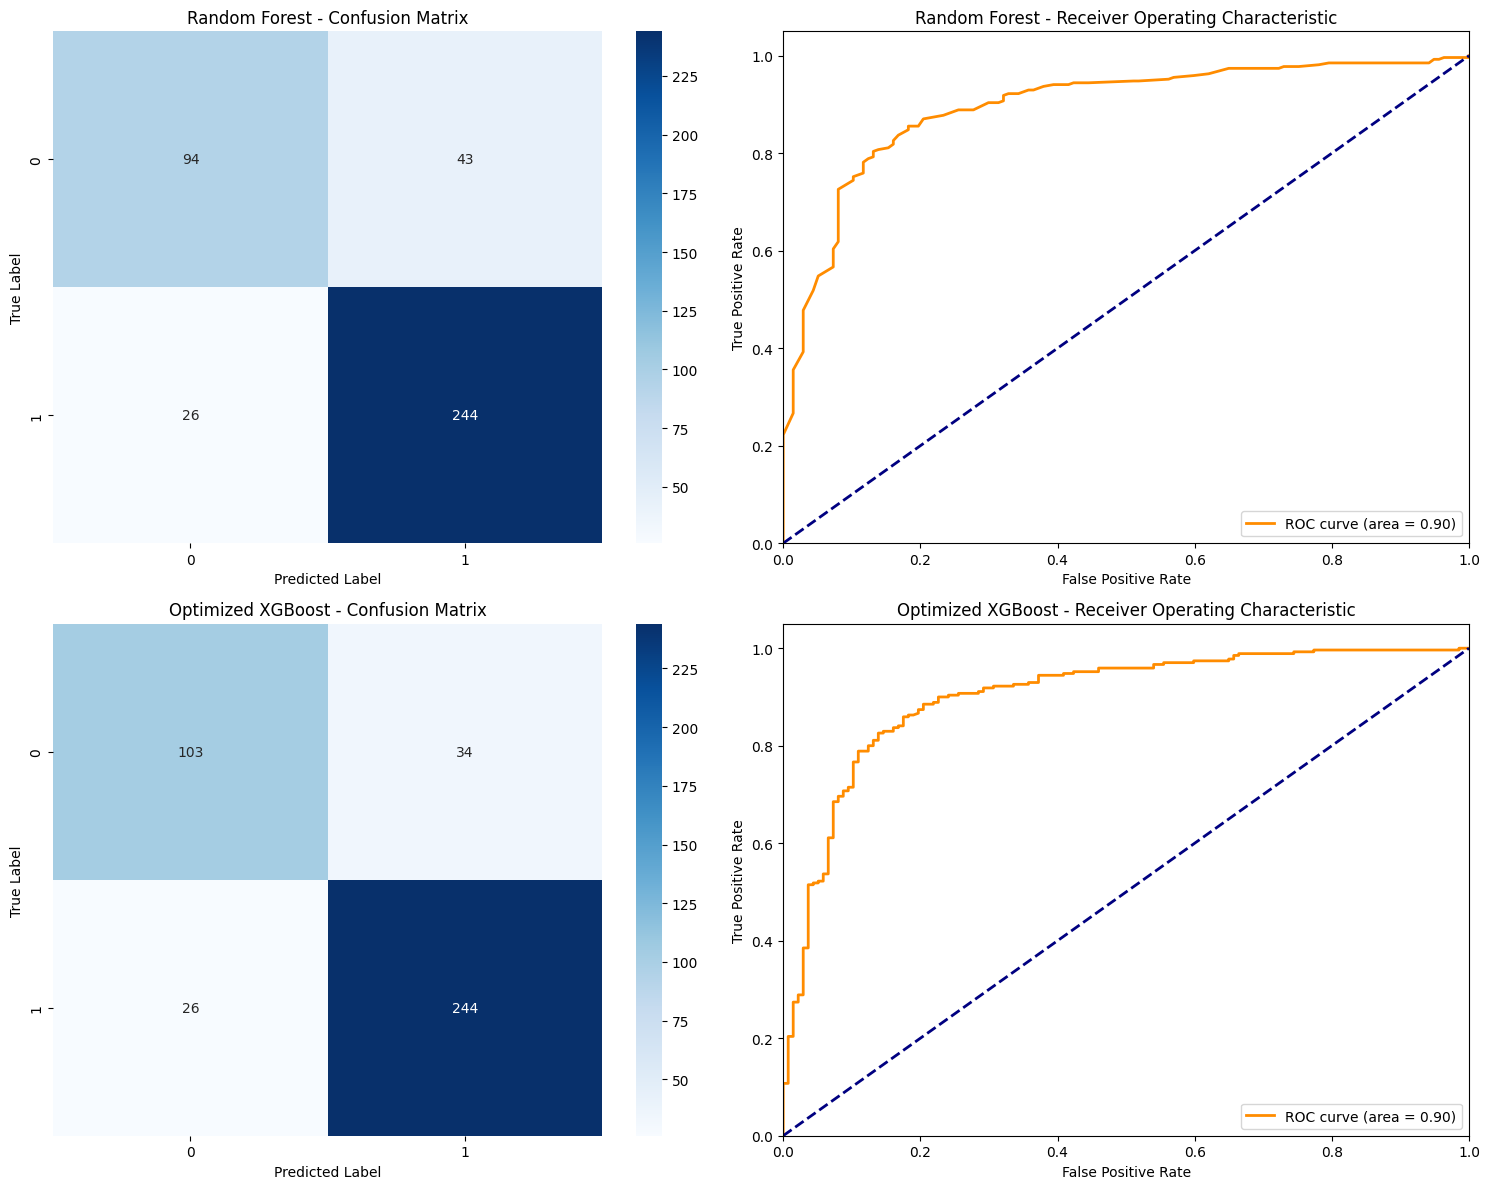

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

models = {'Random Forest': rf, 'Optimized XGBoost': best_xgb_model}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i*2])
    axes[i*2].set_title(f'{name} - Confusion Matrix')
    axes[i*2].set_xlabel('Predicted Label')
    axes[i*2].set_ylabel('True Label')

    # ROC Curve
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    axes[i*2 + 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[i*2 + 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i*2 + 1].set_xlim([0.0, 1.0])
    axes[i*2 + 1].set_ylim([0.0, 1.05])
    axes[i*2 + 1].set_xlabel('False Positive Rate')
    axes[i*2 + 1].set_ylabel('True Positive Rate')
    axes[i*2 + 1].set_title(f'{name} - Receiver Operating Characteristic')
    axes[i*2 + 1].legend(loc='lower right')

plt.tight_layout()
plt.show()

### Selecting the Best Model based on F1-score

Comparing the F1-scores, which are suitable for imbalanced datasets:

*   **Random Forest F1-score:** `0.8761`
*   **Optimized XGBoost F1-score:** `0.8905`

Based on these F1-scores, the **Optimized XGBoost Model** has a slightly higher F1-score (0.8905) compared to the Random Forest model (0.8761). This suggests that the Optimized XGBoost model is marginally better at balancing precision and recall for our classes, making it the preferred model for this task.

Based on the F1-scores, which are particularly suitable for evaluating models on potentially imbalanced datasets, the Optimized XGBoost Model is identified as the better performer:

Random Forest F1-score: 0.8761
Optimized XGBoost F1-score: 0.8905

Therefore, the Optimized XGBoost model is selected as the preferred model for this task due to its marginally higher F1-score.

# Optimized XGBoost model is selected as the preferred model

### The End of Predictive Model

by Reinier Kamphorst, 7 november 2025